In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
con = sqlite3.connect(r'D:\amazon ds\database.sqlite')
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3  """, con)


def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)



Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [3]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

final = sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep = 'first' ,inplace=False)
final.shape

final = final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#final.shape

final=final.sample(100000)
print(final.shape)

(100000, 10)


In [4]:
from tqdm import tqdm
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,'',sentence)
    return cleantext
#define function to clean the word of punctuation or special character
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
    

In [5]:

sno = nltk.stem.SnowballStemmer('english')


In [6]:
#Code for removing HTML tags , punctuations . Code for removing stopwords . Code for checking if word is not alphanumeric and
# also greater than 2 . Code for stemmimg and also to convert them to lowercase letters 
import re
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 1: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 0:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    
    
    final_string.append(str1)
    i+=1
    
    

In [7]:
final['CleanedText']=final_string  
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
#below the processed review can be seen in the CleanedText Column 
print('Shape of final',final.shape)
final.head()

Shape of final (100000, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
255254,276732,B0028VZEJQ,AKMS1MWSM46BN,"Anne M. Winz ""Writermom""",5,8,0,1315353600,Bag arrived opened.,Delighted that the shipment arrived one day ea...,delight shipment arriv one day earli disappoin...
162312,175975,B007TGO1U8,A3TX46J8SBZPG3,"brazos49 ""brazos49""",14,16,0,1341619200,"Metallic, more fruity and tart than sweet",I used 2 of these packets in tea and got rid o...,use packet tea got rid rest found tast unpleas...
447649,484012,B004N5KUI0,A34CXWQGEFHLZ8,"ItzMzBunny ""On The Know Girl""",1,1,1,1320105600,Colours Please!,I usually love just hard candy any day of the ...,usual love hard candi day week halloween love ...
146900,159346,B000YT3LSU,A1AKVWRPL4QLBH,P. Seibert,1,2,1,1224115200,Great peanuts!,"I like Azar peanuts, pecans, macadamia, walnut...",like azar peanut pecan macadamia walnut produc...
390400,422112,B0012KK462,A2LC4ZQRY9YHE9,"C. Muhlbauer ""Artiste""",1,1,1,1326326400,FancyFeast cat food,The service is ALWAYS good! They are always pr...,servic alway good alway prompt well cat love s...


In [8]:
cleaned_text=final['CleanedText'].values

In [9]:
print("Shape of the data : ",cleaned_text.shape)

Shape of the data :  (100000,)


In [10]:
all_words=[]
for sentence in cleaned_text:
    words = sentence.split()
    all_words += words

In [11]:
print(len(all_words))

3835798


In [12]:
counts = Counter(all_words)

In [13]:
vocabulary = len(counts.most_common()) + 1

In [14]:
top_words=counts.most_common(7000)
print(len(top_words))

7000


In [15]:
word_index_lookup = dict()
i = 1
for word,frequency in top_words:
    word_index_lookup[word] = i
    i += 1

In [16]:
print("Top 25 words with their frequencies:")
print(counts.most_common(25))

Top 25 words with their frequencies:
[('like', 47377), ('tast', 44624), ('flavor', 35526), ('good', 34972), ('product', 32881), ('use', 32688), ('one', 32019), ('love', 31860), ('great', 29879), ('tri', 28705), ('tea', 26483), ('coffe', 25224), ('get', 23674), ('make', 23400), ('food', 21086), ('would', 20310), ('buy', 18741), ('time', 18008), ('realli', 17252), ('eat', 16854), ('amazon', 16309), ('order', 16185), ('dont', 16110), ('much', 15640), ('price', 15157)]


In [17]:
def ranking(row):  
    buffer = []
    for word in row['CleanedText'].split():
        if word in word_index_lookup:
            buffer.append(word_index_lookup[word]) 
        else:
            buffer.append(0)            
    return buffer


final['CleanedText_Index'] = final.apply(lambda row: ranking(row),axis=1)
final.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_Index
255254,276732,B0028VZEJQ,AKMS1MWSM46BN,"Anne M. Winz ""Writermom""",5,8,0,1315353600,Bag arrived opened.,Delighted that the shipment arrived one day ea...,delight shipment arriv one day earli disappoin...,"[642, 680, 182, 7, 41, 1160, 204, 143, 38, 570..."
162312,175975,B007TGO1U8,A3TX46J8SBZPG3,"brazos49 ""brazos49""",14,16,0,1341619200,"Metallic, more fruity and tart than sweet",I used 2 of these packets in tea and got rid o...,use packet tea got rid rest found tast unpleas...,"[6, 312, 11, 88, 1572, 586, 52, 2, 1400, 115, ..."
447649,484012,B004N5KUI0,A34CXWQGEFHLZ8,"ItzMzBunny ""On The Know Girl""",1,1,1,1320105600,Colours Please!,I usually love just hard candy any day of the ...,usual love hard candi day week halloween love ...,"[184, 8, 128, 148, 41, 198, 2260, 8, 40, 436, ..."
146900,159346,B000YT3LSU,A1AKVWRPL4QLBH,P. Seibert,1,2,1,1224115200,Great peanuts!,"I like Azar peanuts, pecans, macadamia, walnut...",like azar peanut pecan macadamia walnut produc...,"[1, 0, 210, 1456, 2528, 1438, 5, 17, 403, 13, ..."
390400,422112,B0012KK462,A2LC4ZQRY9YHE9,"C. Muhlbauer ""Artiste""",1,1,1,1326326400,FancyFeast cat food,The service is ALWAYS good! They are always pr...,servic alway good alway prompt well cat love s...,"[511, 102, 4, 102, 994, 34, 80, 8, 92, 241, 20..."


In [18]:

x_train, x_test, y_train, y_test = train_test_split(final['CleanedText_Index'].values,final['Score'], test_size=0.3,shuffle=False,random_state=0)
                                                    
                                                           
                                                            
                                                            

In [19]:
print("Total number words present in first review:\n",len(x_train[1]))
print()
print("List of word indexes present in first review:\n", x_train[1])
print()

Total number words present in first review:
 48

List of word indexes present in first review:
 [6, 312, 11, 88, 1572, 586, 52, 2, 1400, 115, 107, 47, 856, 1066, 47, 1172, 1329, 1, 516, 155, 751, 2739, 369, 2, 73, 194, 1, 292, 194, 585, 73, 2422, 564, 26, 23, 1, 830, 194, 1, 5, 37, 251, 830, 352, 445, 17, 0, 660]



In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
# fix random seed for reproducibility
np.random.seed(7)

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
max_review_length = 300
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print("Total number words present in first review after padding:\n",len(x_train[1]))
print()
print("List of word indexes present in first review padding:\n", x_train[1])
print()

Total number words present in first review after padding:
 300

List of word indexes present in first review padding:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    

In [22]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# 1 Layer Archi

In [55]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 32)           1492992   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,546,293
Trainable params: 1,546,293
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - ETA: 11:47 - loss: 0.6616 - acc: 0.81 - ETA: 11:33 - loss: 0.6543 - acc: 0.83 - ETA: 11:26 - loss: 0.6452 - acc: 0.84 - ETA: 11:36 - loss: 0.6377 - acc: 0.84 - ETA: 12:20 - loss: 0.6267 - acc: 0.84 - ETA: 12:56 - loss: 0.6145 - acc: 0.84 - ETA: 13:07 - loss: 0.5966 - acc: 0.83 - ETA: 12:56 - loss: 0.5760 - acc: 0.84 - ETA: 12:50 - loss: 0.5684 - acc: 0.84 - ETA: 12:47 - loss: 0.5585 - acc: 0.84 - ETA: 12:36 - loss: 0.5497 - acc: 0.83 - ETA: 12:24 - loss: 0.5427 - acc: 0.83 - ETA: 12:12 - loss: 0.5339 - acc: 0.83 - ETA: 12:05 - loss: 0.5307 - acc: 0.83 - ETA: 11:57 - loss: 0.5258 - acc: 0.83 - ETA: 11:49 - loss: 0.5232 - acc: 0.83 - ETA: 11:41 - loss: 0.5198 - acc: 0.83 - ETA: 11:39 - loss: 0.5159 - acc: 0.83 - ETA: 11:41 - loss: 0.5127 - acc: 0.83 - ETA: 11:33 - loss: 0.5093 - acc: 0.83 - ETA: 11:24 - loss: 0.5044 - acc: 0.83 - ETA: 11:20 - loss: 0.5002 - acc: 0.83 - ETA: 11:12 -

70000/70000 [==============================] - ETA: 14:20 - loss: 0.1458 - acc: 0.94 - ETA: 14:05 - loss: 0.1388 - acc: 0.94 - ETA: 14:05 - loss: 0.1593 - acc: 0.93 - ETA: 13:56 - loss: 0.1626 - acc: 0.93 - ETA: 13:46 - loss: 0.1669 - acc: 0.93 - ETA: 13:34 - loss: 0.1707 - acc: 0.93 - ETA: 13:33 - loss: 0.1700 - acc: 0.93 - ETA: 13:29 - loss: 0.1692 - acc: 0.93 - ETA: 13:17 - loss: 0.1670 - acc: 0.93 - ETA: 13:09 - loss: 0.1673 - acc: 0.93 - ETA: 13:06 - loss: 0.1666 - acc: 0.93 - ETA: 12:56 - loss: 0.1683 - acc: 0.93 - ETA: 12:55 - loss: 0.1677 - acc: 0.93 - ETA: 12:50 - loss: 0.1680 - acc: 0.93 - ETA: 12:42 - loss: 0.1681 - acc: 0.93 - ETA: 12:36 - loss: 0.1697 - acc: 0.93 - ETA: 12:29 - loss: 0.1709 - acc: 0.93 - ETA: 12:23 - loss: 0.1694 - acc: 0.93 - ETA: 12:15 - loss: 0.1698 - acc: 0.93 - ETA: 12:07 - loss: 0.1689 - acc: 0.93 - ETA: 12:02 - loss: 0.1682 - acc: 0.93 - ETA: 11:55 - loss: 0.1711 - acc: 0.93 - ETA: 11:48 - loss: 0.1703 - acc: 0.93 - ETA: 11:41 - loss: 0.1688 - acc: 

70000/70000 [==============================] - ETA: 13:10 - loss: 0.1376 - acc: 0.95 - ETA: 12:44 - loss: 0.1430 - acc: 0.95 - ETA: 12:46 - loss: 0.1538 - acc: 0.94 - ETA: 12:40 - loss: 0.1473 - acc: 0.95 - ETA: 12:36 - loss: 0.1530 - acc: 0.94 - ETA: 12:28 - loss: 0.1589 - acc: 0.94 - ETA: 12:23 - loss: 0.1535 - acc: 0.94 - ETA: 12:13 - loss: 0.1529 - acc: 0.94 - ETA: 12:07 - loss: 0.1504 - acc: 0.95 - ETA: 12:04 - loss: 0.1494 - acc: 0.95 - ETA: 11:58 - loss: 0.1495 - acc: 0.94 - ETA: 11:52 - loss: 0.1488 - acc: 0.94 - ETA: 11:47 - loss: 0.1487 - acc: 0.94 - ETA: 11:46 - loss: 0.1475 - acc: 0.94 - ETA: 11:41 - loss: 0.1483 - acc: 0.94 - ETA: 11:34 - loss: 0.1493 - acc: 0.94 - ETA: 11:31 - loss: 0.1479 - acc: 0.94 - ETA: 11:26 - loss: 0.1484 - acc: 0.94 - ETA: 11:20 - loss: 0.1488 - acc: 0.94 - ETA: 11:13 - loss: 0.1473 - acc: 0.94 - ETA: 11:08 - loss: 0.1483 - acc: 0.94 - ETA: 11:02 - loss: 0.1469 - acc: 0.94 - ETA: 10:56 - loss: 0.1471 - acc: 0.94 - ETA: 10:49 - loss: 0.1468 - acc: 

70000/70000 [==============================] - ETA: 13:48 - loss: 0.1439 - acc: 0.94 - ETA: 13:52 - loss: 0.1676 - acc: 0.94 - ETA: 14:01 - loss: 0.1557 - acc: 0.94 - ETA: 13:57 - loss: 0.1534 - acc: 0.94 - ETA: 13:42 - loss: 0.1547 - acc: 0.94 - ETA: 13:44 - loss: 0.1492 - acc: 0.94 - ETA: 13:44 - loss: 0.1508 - acc: 0.94 - ETA: 13:41 - loss: 0.1487 - acc: 0.94 - ETA: 13:36 - loss: 0.1532 - acc: 0.94 - ETA: 13:42 - loss: 0.1581 - acc: 0.94 - ETA: 13:33 - loss: 0.1584 - acc: 0.94 - ETA: 13:26 - loss: 0.1583 - acc: 0.94 - ETA: 13:17 - loss: 0.1567 - acc: 0.94 - ETA: 13:12 - loss: 0.1542 - acc: 0.94 - ETA: 13:04 - loss: 0.1533 - acc: 0.94 - ETA: 12:55 - loss: 0.1527 - acc: 0.94 - ETA: 12:49 - loss: 0.1517 - acc: 0.94 - ETA: 12:41 - loss: 0.1527 - acc: 0.94 - ETA: 12:33 - loss: 0.1536 - acc: 0.94 - ETA: 12:26 - loss: 0.1515 - acc: 0.94 - ETA: 12:20 - loss: 0.1516 - acc: 0.94 - ETA: 12:13 - loss: 0.1508 - acc: 0.94 - ETA: 12:06 - loss: 0.1513 - acc: 0.94 - ETA: 12:02 - loss: 0.1513 - acc: 

70000/70000 [==============================] - ETA: 13:41 - loss: 0.1543 - acc: 0.94 - ETA: 13:49 - loss: 0.1702 - acc: 0.93 - ETA: 13:39 - loss: 0.1599 - acc: 0.94 - ETA: 13:30 - loss: 0.1533 - acc: 0.94 - ETA: 13:20 - loss: 0.1440 - acc: 0.95 - ETA: 13:19 - loss: 0.1393 - acc: 0.95 - ETA: 13:16 - loss: 0.1377 - acc: 0.95 - ETA: 13:07 - loss: 0.1405 - acc: 0.95 - ETA: 13:00 - loss: 0.1372 - acc: 0.95 - ETA: 12:53 - loss: 0.1364 - acc: 0.95 - ETA: 12:45 - loss: 0.1346 - acc: 0.95 - ETA: 12:35 - loss: 0.1327 - acc: 0.95 - ETA: 12:30 - loss: 0.1314 - acc: 0.95 - ETA: 12:26 - loss: 0.1321 - acc: 0.95 - ETA: 12:20 - loss: 0.1329 - acc: 0.95 - ETA: 12:13 - loss: 0.1341 - acc: 0.95 - ETA: 12:07 - loss: 0.1334 - acc: 0.95 - ETA: 12:02 - loss: 0.1342 - acc: 0.95 - ETA: 11:54 - loss: 0.1347 - acc: 0.95 - ETA: 11:49 - loss: 0.1334 - acc: 0.95 - ETA: 11:44 - loss: 0.1326 - acc: 0.95 - ETA: 11:38 - loss: 0.1316 - acc: 0.95 - ETA: 11:32 - loss: 0.1322 - acc: 0.95 - ETA: 11:27 - loss: 0.1335 - acc: 

Test loss: 0.24271324623425802
Test accuracy: 0.9112666666666667


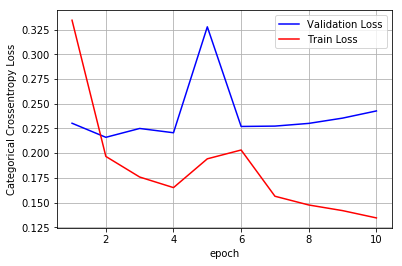

In [59]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [23]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,dropout=0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           1505216   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,558,517
Trainable params: 1,558,517
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - ETA: 10:42 - loss: 0.6927 - acc: 0.52 - ETA: 8:16 - loss: 0.6898 - acc: 0.6826 - ETA: 7:17 - loss: 0.6870 - acc: 0.734 - ETA: 6:48 - loss: 0.6837 - acc: 0.761 - ETA: 6:34 - loss: 0.6800 - acc: 0.777 - ETA: 6:25 - loss: 0.6760 - acc: 0.787 - ETA: 6:18 - loss: 0.6710 - acc: 0.794 - ETA: 6:14 - loss: 0.6651 - acc: 0.800 - ETA: 6:08 - loss: 0.6568 - acc: 0.807 - ETA: 6:06 - loss: 0.6462 - acc: 0.812 - ETA: 6:01 - loss: 0.6333 - acc: 0.814 - ETA: 5:56 - loss: 0.6182 - acc: 0.815 - ETA: 5:52 - loss: 0.6139 - acc: 0.815 - ETA: 5:50 - loss: 0.5992 - acc: 0.819 - ETA: 5:49 - loss: 0.5885 - acc: 0.821 - ETA: 5:47 - loss: 0.5798 - acc: 0.822 - ETA: 5:46 - loss: 0.5712 - acc: 0.823 - ETA: 5:44 - loss: 0.5652 - acc: 0.823 - ETA: 5:41 - loss: 0.5592 - acc: 0.824 - ETA: 5:39 - loss: 0.5529 - acc: 0.825 - ETA: 5:37 - loss: 0.5481 - acc: 0.825 - ETA: 5:34 - loss: 0.5439 - acc: 0.826 - ETA: 5:31 -

70000/70000 [==============================] - ETA: 12:59 - loss: 0.2339 - acc: 0.91 - ETA: 12:42 - loss: 0.2109 - acc: 0.92 - ETA: 12:43 - loss: 0.2128 - acc: 0.92 - ETA: 12:37 - loss: 0.2152 - acc: 0.91 - ETA: 12:26 - loss: 0.2217 - acc: 0.91 - ETA: 12:16 - loss: 0.2196 - acc: 0.91 - ETA: 12:12 - loss: 0.2114 - acc: 0.91 - ETA: 12:08 - loss: 0.2147 - acc: 0.91 - ETA: 12:01 - loss: 0.2135 - acc: 0.91 - ETA: 11:55 - loss: 0.2115 - acc: 0.91 - ETA: 11:55 - loss: 0.2162 - acc: 0.91 - ETA: 11:52 - loss: 0.2123 - acc: 0.91 - ETA: 11:46 - loss: 0.2102 - acc: 0.91 - ETA: 11:41 - loss: 0.2099 - acc: 0.91 - ETA: 11:36 - loss: 0.2110 - acc: 0.91 - ETA: 11:31 - loss: 0.2113 - acc: 0.91 - ETA: 11:26 - loss: 0.2099 - acc: 0.91 - ETA: 11:20 - loss: 0.2097 - acc: 0.91 - ETA: 11:16 - loss: 0.2111 - acc: 0.91 - ETA: 11:11 - loss: 0.2130 - acc: 0.91 - ETA: 11:06 - loss: 0.2123 - acc: 0.91 - ETA: 11:00 - loss: 0.2107 - acc: 0.91 - ETA: 10:54 - loss: 0.2111 - acc: 0.91 - ETA: 10:49 - loss: 0.2121 - acc: 

70000/70000 [==============================] - ETA: 13:36 - loss: 0.1613 - acc: 0.93 - ETA: 13:27 - loss: 0.1784 - acc: 0.93 - ETA: 13:29 - loss: 0.1797 - acc: 0.92 - ETA: 13:29 - loss: 0.1809 - acc: 0.92 - ETA: 13:38 - loss: 0.1810 - acc: 0.92 - ETA: 13:41 - loss: 0.1786 - acc: 0.92 - ETA: 13:32 - loss: 0.1765 - acc: 0.92 - ETA: 13:19 - loss: 0.1756 - acc: 0.93 - ETA: 13:07 - loss: 0.1742 - acc: 0.93 - ETA: 12:58 - loss: 0.1755 - acc: 0.93 - ETA: 12:45 - loss: 0.1758 - acc: 0.93 - ETA: 12:35 - loss: 0.1738 - acc: 0.93 - ETA: 12:26 - loss: 0.1768 - acc: 0.93 - ETA: 12:19 - loss: 0.1766 - acc: 0.93 - ETA: 12:11 - loss: 0.1753 - acc: 0.93 - ETA: 12:06 - loss: 0.1776 - acc: 0.93 - ETA: 12:00 - loss: 0.1780 - acc: 0.93 - ETA: 11:56 - loss: 0.1806 - acc: 0.92 - ETA: 11:48 - loss: 0.1806 - acc: 0.92 - ETA: 11:40 - loss: 0.1829 - acc: 0.92 - ETA: 11:34 - loss: 0.1819 - acc: 0.92 - ETA: 11:29 - loss: 0.1827 - acc: 0.92 - ETA: 11:25 - loss: 0.1842 - acc: 0.92 - ETA: 11:19 - loss: 0.1846 - acc: 

70000/70000 [==============================] - ETA: 13:05 - loss: 0.1659 - acc: 0.93 - ETA: 13:03 - loss: 0.1743 - acc: 0.94 - ETA: 12:58 - loss: 0.1671 - acc: 0.93 - ETA: 12:46 - loss: 0.1647 - acc: 0.94 - ETA: 12:38 - loss: 0.1617 - acc: 0.94 - ETA: 12:35 - loss: 0.1577 - acc: 0.94 - ETA: 12:31 - loss: 0.1635 - acc: 0.94 - ETA: 12:26 - loss: 0.1633 - acc: 0.94 - ETA: 12:18 - loss: 0.1633 - acc: 0.94 - ETA: 12:11 - loss: 0.1663 - acc: 0.94 - ETA: 12:06 - loss: 0.1670 - acc: 0.94 - ETA: 12:00 - loss: 0.1671 - acc: 0.93 - ETA: 11:54 - loss: 0.1647 - acc: 0.93 - ETA: 11:49 - loss: 0.1637 - acc: 0.93 - ETA: 11:43 - loss: 0.1622 - acc: 0.94 - ETA: 11:38 - loss: 0.1610 - acc: 0.94 - ETA: 11:31 - loss: 0.1598 - acc: 0.94 - ETA: 11:24 - loss: 0.1623 - acc: 0.93 - ETA: 11:19 - loss: 0.1637 - acc: 0.93 - ETA: 11:13 - loss: 0.1657 - acc: 0.93 - ETA: 11:07 - loss: 0.1675 - acc: 0.93 - ETA: 11:01 - loss: 0.1685 - acc: 0.93 - ETA: 10:56 - loss: 0.1696 - acc: 0.93 - ETA: 10:50 - loss: 0.1698 - acc: 

70000/70000 [==============================] - ETA: 13:39 - loss: 0.1500 - acc: 0.95 - ETA: 13:49 - loss: 0.1651 - acc: 0.94 - ETA: 13:38 - loss: 0.1644 - acc: 0.94 - ETA: 13:28 - loss: 0.1660 - acc: 0.94 - ETA: 13:24 - loss: 0.1615 - acc: 0.94 - ETA: 13:13 - loss: 0.1605 - acc: 0.94 - ETA: 13:03 - loss: 0.1606 - acc: 0.94 - ETA: 13:02 - loss: 0.1549 - acc: 0.94 - ETA: 12:59 - loss: 0.1595 - acc: 0.94 - ETA: 12:54 - loss: 0.1583 - acc: 0.94 - ETA: 12:43 - loss: 0.1565 - acc: 0.94 - ETA: 12:35 - loss: 0.1537 - acc: 0.94 - ETA: 12:28 - loss: 0.1537 - acc: 0.94 - ETA: 12:19 - loss: 0.1544 - acc: 0.94 - ETA: 12:09 - loss: 0.1546 - acc: 0.94 - ETA: 12:04 - loss: 0.1569 - acc: 0.94 - ETA: 12:01 - loss: 0.1573 - acc: 0.94 - ETA: 11:54 - loss: 0.1570 - acc: 0.94 - ETA: 11:48 - loss: 0.1562 - acc: 0.94 - ETA: 11:43 - loss: 0.1567 - acc: 0.94 - ETA: 11:37 - loss: 0.1582 - acc: 0.94 - ETA: 11:33 - loss: 0.1581 - acc: 0.94 - ETA: 11:26 - loss: 0.1581 - acc: 0.94 - ETA: 11:18 - loss: 0.1587 - acc: 

70000/70000 [==============================] - ETA: 17:07 - loss: 0.1680 - acc: 0.93 - ETA: 15:51 - loss: 0.1557 - acc: 0.94 - ETA: 15:16 - loss: 0.1552 - acc: 0.94 - ETA: 14:44 - loss: 0.1525 - acc: 0.93 - ETA: 14:33 - loss: 0.1560 - acc: 0.93 - ETA: 14:17 - loss: 0.1529 - acc: 0.93 - ETA: 14:10 - loss: 0.1544 - acc: 0.94 - ETA: 13:54 - loss: 0.1540 - acc: 0.94 - ETA: 13:44 - loss: 0.1524 - acc: 0.94 - ETA: 13:42 - loss: 0.1528 - acc: 0.94 - ETA: 13:30 - loss: 0.1524 - acc: 0.94 - ETA: 13:24 - loss: 0.1487 - acc: 0.94 - ETA: 13:17 - loss: 0.1493 - acc: 0.94 - ETA: 13:10 - loss: 0.1499 - acc: 0.94 - ETA: 13:02 - loss: 0.1503 - acc: 0.94 - ETA: 12:54 - loss: 0.1509 - acc: 0.94 - ETA: 12:46 - loss: 0.1525 - acc: 0.94 - ETA: 12:44 - loss: 0.1541 - acc: 0.94 - ETA: 12:39 - loss: 0.1538 - acc: 0.94 - ETA: 12:34 - loss: 0.1531 - acc: 0.94 - ETA: 12:27 - loss: 0.1534 - acc: 0.94 - ETA: 12:19 - loss: 0.1533 - acc: 0.94 - ETA: 12:12 - loss: 0.1539 - acc: 0.94 - ETA: 12:04 - loss: 0.1541 - acc: 

70000/70000 [==============================] - ETA: 15:27 - loss: 0.1608 - acc: 0.94 - ETA: 15:02 - loss: 0.1519 - acc: 0.94 - ETA: 14:52 - loss: 0.1449 - acc: 0.94 - ETA: 14:47 - loss: 0.1511 - acc: 0.94 - ETA: 14:31 - loss: 0.1490 - acc: 0.94 - ETA: 14:19 - loss: 0.1504 - acc: 0.94 - ETA: 14:11 - loss: 0.1491 - acc: 0.94 - ETA: 14:03 - loss: 0.1516 - acc: 0.94 - ETA: 13:53 - loss: 0.1502 - acc: 0.94 - ETA: 13:42 - loss: 0.1451 - acc: 0.94 - ETA: 13:34 - loss: 0.1465 - acc: 0.94 - ETA: 13:28 - loss: 0.1445 - acc: 0.94 - ETA: 13:21 - loss: 0.1450 - acc: 0.94 - ETA: 13:11 - loss: 0.1433 - acc: 0.94 - ETA: 13:03 - loss: 0.1460 - acc: 0.94 - ETA: 12:59 - loss: 0.1463 - acc: 0.94 - ETA: 12:52 - loss: 0.1468 - acc: 0.94 - ETA: 12:44 - loss: 0.1479 - acc: 0.94 - ETA: 12:38 - loss: 0.1468 - acc: 0.94 - ETA: 12:33 - loss: 0.1447 - acc: 0.94 - ETA: 12:30 - loss: 0.1449 - acc: 0.94 - ETA: 12:25 - loss: 0.1469 - acc: 0.94 - ETA: 12:20 - loss: 0.1467 - acc: 0.94 - ETA: 12:16 - loss: 0.1463 - acc: 

70000/70000 [==============================] - ETA: 14:30 - loss: 0.1678 - acc: 0.93 - ETA: 14:17 - loss: 0.1448 - acc: 0.94 - ETA: 13:58 - loss: 0.1511 - acc: 0.94 - ETA: 13:48 - loss: 0.1459 - acc: 0.94 - ETA: 13:50 - loss: 0.1420 - acc: 0.94 - ETA: 13:47 - loss: 0.1410 - acc: 0.94 - ETA: 13:42 - loss: 0.1386 - acc: 0.94 - ETA: 13:34 - loss: 0.1394 - acc: 0.94 - ETA: 13:30 - loss: 0.1407 - acc: 0.94 - ETA: 13:24 - loss: 0.1451 - acc: 0.94 - ETA: 13:16 - loss: 0.1419 - acc: 0.94 - ETA: 13:08 - loss: 0.1429 - acc: 0.94 - ETA: 13:02 - loss: 0.1425 - acc: 0.94 - ETA: 12:56 - loss: 0.1417 - acc: 0.95 - ETA: 12:48 - loss: 0.1434 - acc: 0.94 - ETA: 12:40 - loss: 0.1420 - acc: 0.95 - ETA: 12:35 - loss: 0.1412 - acc: 0.95 - ETA: 12:29 - loss: 0.1420 - acc: 0.94 - ETA: 12:22 - loss: 0.1415 - acc: 0.94 - ETA: 12:16 - loss: 0.1418 - acc: 0.94 - ETA: 12:10 - loss: 0.1433 - acc: 0.94 - ETA: 12:03 - loss: 0.1443 - acc: 0.94 - ETA: 11:56 - loss: 0.1460 - acc: 0.94 - ETA: 11:49 - loss: 0.1469 - acc: 

70000/70000 [==============================] - ETA: 14:46 - loss: 0.1114 - acc: 0.97 - ETA: 14:32 - loss: 0.1186 - acc: 0.96 - ETA: 14:28 - loss: 0.1201 - acc: 0.95 - ETA: 14:12 - loss: 0.1214 - acc: 0.95 - ETA: 14:02 - loss: 0.1236 - acc: 0.95 - ETA: 13:58 - loss: 0.1268 - acc: 0.95 - ETA: 13:53 - loss: 0.1328 - acc: 0.95 - ETA: 13:47 - loss: 0.1335 - acc: 0.95 - ETA: 13:39 - loss: 0.1338 - acc: 0.95 - ETA: 13:33 - loss: 0.1323 - acc: 0.95 - ETA: 13:26 - loss: 0.1327 - acc: 0.95 - ETA: 13:20 - loss: 0.1296 - acc: 0.95 - ETA: 13:12 - loss: 0.1333 - acc: 0.95 - ETA: 13:04 - loss: 0.1340 - acc: 0.95 - ETA: 12:58 - loss: 0.1352 - acc: 0.95 - ETA: 12:51 - loss: 0.1338 - acc: 0.95 - ETA: 12:43 - loss: 0.1355 - acc: 0.95 - ETA: 12:36 - loss: 0.1347 - acc: 0.95 - ETA: 12:30 - loss: 0.1352 - acc: 0.95 - ETA: 12:24 - loss: 0.1377 - acc: 0.95 - ETA: 12:17 - loss: 0.1373 - acc: 0.95 - ETA: 12:10 - loss: 0.1380 - acc: 0.95 - ETA: 12:04 - loss: 0.1381 - acc: 0.95 - ETA: 11:57 - loss: 0.1385 - acc: 

70000/70000 [==============================] - ETA: 14:39 - loss: 0.1316 - acc: 0.96 - ETA: 14:06 - loss: 0.1457 - acc: 0.95 - ETA: 13:57 - loss: 0.1419 - acc: 0.94 - ETA: 13:59 - loss: 0.1448 - acc: 0.94 - ETA: 13:56 - loss: 0.1414 - acc: 0.94 - ETA: 13:48 - loss: 0.1391 - acc: 0.94 - ETA: 13:39 - loss: 0.1353 - acc: 0.95 - ETA: 13:34 - loss: 0.1370 - acc: 0.95 - ETA: 13:29 - loss: 0.1317 - acc: 0.95 - ETA: 13:22 - loss: 0.1332 - acc: 0.95 - ETA: 13:13 - loss: 0.1313 - acc: 0.95 - ETA: 13:07 - loss: 0.1295 - acc: 0.95 - ETA: 13:01 - loss: 0.1307 - acc: 0.95 - ETA: 12:53 - loss: 0.1294 - acc: 0.95 - ETA: 12:47 - loss: 0.1338 - acc: 0.95 - ETA: 12:42 - loss: 0.1330 - acc: 0.95 - ETA: 12:36 - loss: 0.1337 - acc: 0.95 - ETA: 12:27 - loss: 0.1350 - acc: 0.95 - ETA: 12:20 - loss: 0.1346 - acc: 0.95 - ETA: 12:14 - loss: 0.1350 - acc: 0.95 - ETA: 12:08 - loss: 0.1352 - acc: 0.95 - ETA: 11:58 - loss: 0.1347 - acc: 0.95 - ETA: 11:47 - loss: 0.1344 - acc: 0.95 - ETA: 11:37 - loss: 0.1356 - acc: 

Test loss: 0.23148375856280326
Test accuracy: 0.9150666666666667


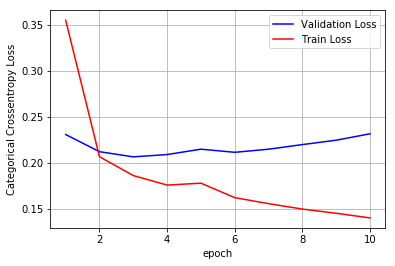

In [26]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [27]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,dropout=0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 32)           1505216   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,558,517
Trainable params: 1,558,517
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - ETA: 14:55 - loss: 0.6931 - acc: 0.49 - ETA: 13:27 - loss: 0.6907 - acc: 0.64 - ETA: 12:40 - loss: 0.6877 - acc: 0.71 - ETA: 12:12 - loss: 0.6845 - acc: 0.75 - ETA: 11:59 - loss: 0.6813 - acc: 0.76 - ETA: 11:50 - loss: 0.6775 - acc: 0.78 - ETA: 11:36 - loss: 0.6738 - acc: 0.78 - ETA: 11:25 - loss: 0.6681 - acc: 0.79 - ETA: 11:19 - loss: 0.6614 - acc: 0.80 - ETA: 11:14 - loss: 0.6547 - acc: 0.80 - ETA: 11:07 - loss: 0.6452 - acc: 0.81 - ETA: 11:00 - loss: 0.6320 - acc: 0.81 - ETA: 10:54 - loss: 0.6174 - acc: 0.81 - ETA: 10:48 - loss: 0.6163 - acc: 0.81 - ETA: 10:41 - loss: 0.6146 - acc: 0.81 - ETA: 10:34 - loss: 0.6016 - acc: 0.82 - ETA: 10:29 - loss: 0.5936 - acc: 0.82 - ETA: 10:23 - loss: 0.5851 - acc: 0.82 - ETA: 10:17 - loss: 0.5787 - acc: 0.82 - ETA: 10:10 - loss: 0.5730 - acc: 0.82 - ETA: 10:04 - loss: 0.5679 - acc: 0.82 - ETA: 9:58 - loss: 0.5626 - acc: 0.8260 - ETA: 9:53 -

70000/70000 [==============================] - ETA: 12:06 - loss: 0.2258 - acc: 0.90 - ETA: 12:04 - loss: 0.2148 - acc: 0.91 - ETA: 12:04 - loss: 0.2085 - acc: 0.91 - ETA: 11:49 - loss: 0.2024 - acc: 0.91 - ETA: 11:34 - loss: 0.2117 - acc: 0.91 - ETA: 11:27 - loss: 0.2171 - acc: 0.91 - ETA: 11:23 - loss: 0.2144 - acc: 0.91 - ETA: 11:17 - loss: 0.2155 - acc: 0.91 - ETA: 11:11 - loss: 0.2192 - acc: 0.91 - ETA: 11:05 - loss: 0.2180 - acc: 0.91 - ETA: 11:01 - loss: 0.2185 - acc: 0.91 - ETA: 10:56 - loss: 0.2165 - acc: 0.91 - ETA: 10:50 - loss: 0.2197 - acc: 0.91 - ETA: 10:44 - loss: 0.2188 - acc: 0.91 - ETA: 10:39 - loss: 0.2194 - acc: 0.91 - ETA: 10:34 - loss: 0.2185 - acc: 0.91 - ETA: 10:29 - loss: 0.2188 - acc: 0.91 - ETA: 10:22 - loss: 0.2155 - acc: 0.91 - ETA: 10:18 - loss: 0.2154 - acc: 0.91 - ETA: 10:13 - loss: 0.2149 - acc: 0.91 - ETA: 10:06 - loss: 0.2159 - acc: 0.91 - ETA: 10:00 - loss: 0.2156 - acc: 0.91 - ETA: 9:56 - loss: 0.2151 - acc: 0.9157 - ETA: 9:51 - loss: 0.2163 - acc: 

70000/70000 [==============================] - ETA: 11:56 - loss: 0.1596 - acc: 0.93 - ETA: 11:43 - loss: 0.1742 - acc: 0.93 - ETA: 11:32 - loss: 0.1745 - acc: 0.92 - ETA: 11:30 - loss: 0.1657 - acc: 0.93 - ETA: 11:31 - loss: 0.1573 - acc: 0.94 - ETA: 11:29 - loss: 0.1581 - acc: 0.94 - ETA: 11:20 - loss: 0.1694 - acc: 0.93 - ETA: 11:17 - loss: 0.1743 - acc: 0.93 - ETA: 11:12 - loss: 0.1785 - acc: 0.93 - ETA: 11:04 - loss: 0.1797 - acc: 0.93 - ETA: 10:58 - loss: 0.1788 - acc: 0.93 - ETA: 10:54 - loss: 0.1784 - acc: 0.93 - ETA: 10:49 - loss: 0.1788 - acc: 0.93 - ETA: 10:43 - loss: 0.1806 - acc: 0.93 - ETA: 10:37 - loss: 0.1785 - acc: 0.93 - ETA: 10:32 - loss: 0.1779 - acc: 0.93 - ETA: 10:29 - loss: 0.1779 - acc: 0.93 - ETA: 10:23 - loss: 0.1786 - acc: 0.93 - ETA: 10:17 - loss: 0.1776 - acc: 0.93 - ETA: 10:12 - loss: 0.1773 - acc: 0.93 - ETA: 10:07 - loss: 0.1784 - acc: 0.93 - ETA: 10:02 - loss: 0.1794 - acc: 0.93 - ETA: 9:56 - loss: 0.1801 - acc: 0.9313 - ETA: 9:50 - loss: 0.1803 - acc: 

70000/70000 [==============================] - ETA: 12:09 - loss: 0.2009 - acc: 0.92 - ETA: 12:02 - loss: 0.1739 - acc: 0.94 - ETA: 11:45 - loss: 0.1727 - acc: 0.93 - ETA: 11:34 - loss: 0.1686 - acc: 0.94 - ETA: 11:33 - loss: 0.1665 - acc: 0.93 - ETA: 11:31 - loss: 0.1697 - acc: 0.93 - ETA: 11:26 - loss: 0.1674 - acc: 0.93 - ETA: 11:19 - loss: 0.1711 - acc: 0.93 - ETA: 11:12 - loss: 0.1710 - acc: 0.93 - ETA: 11:07 - loss: 0.1705 - acc: 0.93 - ETA: 11:02 - loss: 0.1678 - acc: 0.93 - ETA: 10:55 - loss: 0.1687 - acc: 0.93 - ETA: 10:50 - loss: 0.1692 - acc: 0.93 - ETA: 10:46 - loss: 0.1694 - acc: 0.93 - ETA: 10:40 - loss: 0.1707 - acc: 0.93 - ETA: 10:34 - loss: 0.1693 - acc: 0.93 - ETA: 10:28 - loss: 0.1713 - acc: 0.93 - ETA: 10:24 - loss: 0.1690 - acc: 0.93 - ETA: 10:19 - loss: 0.1700 - acc: 0.93 - ETA: 10:14 - loss: 0.1699 - acc: 0.93 - ETA: 10:08 - loss: 0.1696 - acc: 0.93 - ETA: 10:03 - loss: 0.1697 - acc: 0.93 - ETA: 9:58 - loss: 0.1690 - acc: 0.9367 - ETA: 9:52 - loss: 0.1679 - acc: 

70000/70000 [==============================] - ETA: 11:52 - loss: 0.1678 - acc: 0.94 - ETA: 11:35 - loss: 0.1655 - acc: 0.93 - ETA: 11:57 - loss: 0.1598 - acc: 0.94 - ETA: 11:53 - loss: 0.1632 - acc: 0.94 - ETA: 11:44 - loss: 0.1631 - acc: 0.94 - ETA: 11:36 - loss: 0.1671 - acc: 0.94 - ETA: 11:28 - loss: 0.1645 - acc: 0.94 - ETA: 11:23 - loss: 0.1613 - acc: 0.94 - ETA: 11:16 - loss: 0.1595 - acc: 0.94 - ETA: 11:11 - loss: 0.1578 - acc: 0.94 - ETA: 11:07 - loss: 0.1564 - acc: 0.94 - ETA: 11:03 - loss: 0.1577 - acc: 0.94 - ETA: 10:56 - loss: 0.1560 - acc: 0.94 - ETA: 10:49 - loss: 0.1532 - acc: 0.94 - ETA: 10:44 - loss: 0.1529 - acc: 0.94 - ETA: 10:38 - loss: 0.1541 - acc: 0.94 - ETA: 10:32 - loss: 0.1527 - acc: 0.94 - ETA: 10:25 - loss: 0.1556 - acc: 0.94 - ETA: 10:20 - loss: 0.1581 - acc: 0.94 - ETA: 10:14 - loss: 0.1581 - acc: 0.94 - ETA: 10:10 - loss: 0.1583 - acc: 0.94 - ETA: 10:04 - loss: 0.1598 - acc: 0.94 - ETA: 9:58 - loss: 0.1589 - acc: 0.9423 - ETA: 9:53 - loss: 0.1594 - acc: 

70000/70000 [==============================] - ETA: 12:14 - loss: 0.1598 - acc: 0.93 - ETA: 11:55 - loss: 0.1553 - acc: 0.94 - ETA: 11:42 - loss: 0.1537 - acc: 0.94 - ETA: 11:42 - loss: 0.1523 - acc: 0.94 - ETA: 11:35 - loss: 0.1569 - acc: 0.93 - ETA: 11:29 - loss: 0.1517 - acc: 0.94 - ETA: 11:23 - loss: 0.1549 - acc: 0.94 - ETA: 11:16 - loss: 0.1596 - acc: 0.93 - ETA: 11:12 - loss: 0.1590 - acc: 0.94 - ETA: 11:07 - loss: 0.1607 - acc: 0.94 - ETA: 11:02 - loss: 0.1592 - acc: 0.94 - ETA: 10:55 - loss: 0.1562 - acc: 0.94 - ETA: 10:51 - loss: 0.1542 - acc: 0.94 - ETA: 10:46 - loss: 0.1521 - acc: 0.94 - ETA: 10:41 - loss: 0.1518 - acc: 0.94 - ETA: 10:35 - loss: 0.1532 - acc: 0.94 - ETA: 10:30 - loss: 0.1529 - acc: 0.94 - ETA: 10:25 - loss: 0.1501 - acc: 0.94 - ETA: 10:20 - loss: 0.1488 - acc: 0.94 - ETA: 10:14 - loss: 0.1500 - acc: 0.94 - ETA: 10:09 - loss: 0.1506 - acc: 0.94 - ETA: 10:04 - loss: 0.1508 - acc: 0.94 - ETA: 9:58 - loss: 0.1514 - acc: 0.9449 - ETA: 9:54 - loss: 0.1520 - acc: 

70000/70000 [==============================] - ETA: 14:14 - loss: 0.1328 - acc: 0.93 - ETA: 13:25 - loss: 0.1314 - acc: 0.94 - ETA: 13:16 - loss: 0.1393 - acc: 0.94 - ETA: 12:49 - loss: 0.1363 - acc: 0.94 - ETA: 12:40 - loss: 0.1363 - acc: 0.94 - ETA: 12:32 - loss: 0.1362 - acc: 0.94 - ETA: 12:27 - loss: 0.1395 - acc: 0.94 - ETA: 12:17 - loss: 0.1381 - acc: 0.94 - ETA: 12:06 - loss: 0.1390 - acc: 0.94 - ETA: 12:01 - loss: 0.1389 - acc: 0.94 - ETA: 11:54 - loss: 0.1404 - acc: 0.94 - ETA: 11:48 - loss: 0.1390 - acc: 0.94 - ETA: 11:40 - loss: 0.1395 - acc: 0.94 - ETA: 11:34 - loss: 0.1414 - acc: 0.94 - ETA: 11:27 - loss: 0.1424 - acc: 0.94 - ETA: 11:20 - loss: 0.1411 - acc: 0.94 - ETA: 11:10 - loss: 0.1411 - acc: 0.94 - ETA: 11:05 - loss: 0.1411 - acc: 0.94 - ETA: 10:59 - loss: 0.1402 - acc: 0.94 - ETA: 10:51 - loss: 0.1408 - acc: 0.94 - ETA: 10:44 - loss: 0.1405 - acc: 0.94 - ETA: 10:38 - loss: 0.1391 - acc: 0.94 - ETA: 10:32 - loss: 0.1394 - acc: 0.94 - ETA: 10:26 - loss: 0.1393 - acc: 

70000/70000 [==============================] - ETA: 13:58 - loss: 0.1293 - acc: 0.94 - ETA: 13:27 - loss: 0.1518 - acc: 0.94 - ETA: 13:17 - loss: 0.1552 - acc: 0.94 - ETA: 13:11 - loss: 0.1463 - acc: 0.94 - ETA: 12:59 - loss: 0.1455 - acc: 0.94 - ETA: 12:47 - loss: 0.1435 - acc: 0.94 - ETA: 12:42 - loss: 0.1469 - acc: 0.94 - ETA: 12:37 - loss: 0.1434 - acc: 0.94 - ETA: 12:28 - loss: 0.1465 - acc: 0.94 - ETA: 12:21 - loss: 0.1423 - acc: 0.94 - ETA: 12:14 - loss: 0.1433 - acc: 0.94 - ETA: 12:11 - loss: 0.1419 - acc: 0.94 - ETA: 12:04 - loss: 0.1414 - acc: 0.94 - ETA: 11:58 - loss: 0.1410 - acc: 0.94 - ETA: 11:52 - loss: 0.1406 - acc: 0.94 - ETA: 11:46 - loss: 0.1402 - acc: 0.94 - ETA: 11:41 - loss: 0.1405 - acc: 0.94 - ETA: 11:35 - loss: 0.1397 - acc: 0.94 - ETA: 11:28 - loss: 0.1397 - acc: 0.94 - ETA: 11:23 - loss: 0.1399 - acc: 0.94 - ETA: 11:18 - loss: 0.1397 - acc: 0.94 - ETA: 11:12 - loss: 0.1401 - acc: 0.94 - ETA: 11:04 - loss: 0.1410 - acc: 0.94 - ETA: 10:59 - loss: 0.1407 - acc: 

70000/70000 [==============================] - ETA: 12:14 - loss: 0.1365 - acc: 0.94 - ETA: 12:10 - loss: 0.1281 - acc: 0.94 - ETA: 11:57 - loss: 0.1326 - acc: 0.94 - ETA: 12:08 - loss: 0.1368 - acc: 0.94 - ETA: 12:01 - loss: 0.1368 - acc: 0.94 - ETA: 12:00 - loss: 0.1405 - acc: 0.94 - ETA: 11:42 - loss: 0.1416 - acc: 0.94 - ETA: 11:31 - loss: 0.1374 - acc: 0.94 - ETA: 11:23 - loss: 0.1410 - acc: 0.94 - ETA: 11:19 - loss: 0.1396 - acc: 0.94 - ETA: 11:09 - loss: 0.1461 - acc: 0.94 - ETA: 11:02 - loss: 0.1434 - acc: 0.94 - ETA: 10:59 - loss: 0.1426 - acc: 0.94 - ETA: 10:56 - loss: 0.1404 - acc: 0.94 - ETA: 10:50 - loss: 0.1406 - acc: 0.94 - ETA: 10:47 - loss: 0.1398 - acc: 0.94 - ETA: 10:43 - loss: 0.1400 - acc: 0.94 - ETA: 10:37 - loss: 0.1409 - acc: 0.94 - ETA: 10:31 - loss: 0.1410 - acc: 0.94 - ETA: 10:24 - loss: 0.1405 - acc: 0.94 - ETA: 10:22 - loss: 0.1408 - acc: 0.94 - ETA: 10:16 - loss: 0.1407 - acc: 0.94 - ETA: 10:09 - loss: 0.1411 - acc: 0.94 - ETA: 10:02 - loss: 0.1409 - acc: 

70000/70000 [==============================] - ETA: 11:36 - loss: 0.1284 - acc: 0.95 - ETA: 11:32 - loss: 0.1083 - acc: 0.96 - ETA: 11:28 - loss: 0.1066 - acc: 0.96 - ETA: 11:25 - loss: 0.1073 - acc: 0.96 - ETA: 11:15 - loss: 0.1122 - acc: 0.96 - ETA: 11:09 - loss: 0.1107 - acc: 0.96 - ETA: 11:03 - loss: 0.1138 - acc: 0.95 - ETA: 10:54 - loss: 0.1112 - acc: 0.96 - ETA: 10:46 - loss: 0.1120 - acc: 0.95 - ETA: 10:43 - loss: 0.1147 - acc: 0.95 - ETA: 10:38 - loss: 0.1170 - acc: 0.95 - ETA: 10:30 - loss: 0.1187 - acc: 0.95 - ETA: 10:26 - loss: 0.1190 - acc: 0.95 - ETA: 10:23 - loss: 0.1195 - acc: 0.95 - ETA: 10:18 - loss: 0.1197 - acc: 0.95 - ETA: 10:13 - loss: 0.1200 - acc: 0.95 - ETA: 10:06 - loss: 0.1192 - acc: 0.95 - ETA: 10:01 - loss: 0.1208 - acc: 0.95 - ETA: 9:56 - loss: 0.1204 - acc: 0.9553 - ETA: 9:50 - loss: 0.1208 - acc: 0.954 - ETA: 9:45 - loss: 0.1213 - acc: 0.954 - ETA: 9:40 - loss: 0.1208 - acc: 0.954 - ETA: 9:35 - loss: 0.1213 - acc: 0.954 - ETA: 9:30 - loss: 0.1220 - acc: 

Test loss: 0.24365267260074616
Test accuracy: 0.9126


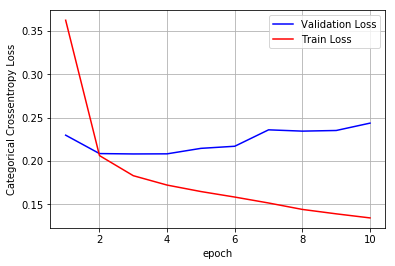

In [30]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2 Layer Archi

In [67]:
from keras.layers import  BatchNormalization
embedding_vecor_length = 32
model=Sequential()
model.add(Embedding(vocabulary, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,return_sequences=True,dropout=0.5))

# Adding second LSTM layer
model.add(LSTM(100, dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 32)           1492992   
_________________________________________________________________
lstm_18 (LSTM)               (None, 300, 100)          53200     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,626,693
Trainable params: 1,626,693
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - ETA: 39:56 - loss: 0.6931 - acc: 0.50 - ETA: 35:50 - loss: 0.6903 - acc: 0.67 - ETA: 34:57 - loss: 0.6863 - acc: 0.74 - ETA: 34:30 - loss: 0.6820 - acc: 0.76 - ETA: 34:13 - loss: 0.6765 - acc: 0.77 - ETA: 34:03 - loss: 0.6685 - acc: 0.79 - ETA: 33:54 - loss: 0.6593 - acc: 0.79 - ETA: 33:51 - loss: 0.6499 - acc: 0.79 - ETA: 34:05 - loss: 0.6321 - acc: 0.80 - ETA: 34:21 - loss: 0.6095 - acc: 0.80 - ETA: 34:10 - loss: 0.5965 - acc: 0.81 - ETA: 34:40 - loss: 0.5875 - acc: 0.81 - ETA: 34:34 - loss: 0.5790 - acc: 0.81 - ETA: 34:23 - loss: 0.5660 - acc: 0.82 - ETA: 34:13 - loss: 0.5566 - acc: 0.82 - ETA: 33:56 - loss: 0.5516 - acc: 0.82 - ETA: 33:43 - loss: 0.5449 - acc: 0.82 - ETA: 33:29 - loss: 0.5418 - acc: 0.82 - ETA: 33:28 - loss: 0.5363 - acc: 0.82 - ETA: 33:35 - loss: 0.5314 - acc: 0.82 - ETA: 33:34 - loss: 0.5269 - acc: 0.82 - ETA: 33:21 - loss: 0.5225 - acc: 0.82 - ETA: 33:07 -

70000/70000 [==============================] - ETA: 1:09:06 - loss: 0.1725 - acc: 0.94 - ETA: 1:08:25 - loss: 0.1860 - acc: 0.93 - ETA: 1:07:36 - loss: 0.1938 - acc: 0.93 - ETA: 1:07:06 - loss: 0.1908 - acc: 0.93 - ETA: 1:06:29 - loss: 0.1856 - acc: 0.93 - ETA: 1:05:51 - loss: 0.1854 - acc: 0.93 - ETA: 1:05:17 - loss: 0.1850 - acc: 0.93 - ETA: 1:04:59 - loss: 0.1921 - acc: 0.93 - ETA: 1:04:32 - loss: 0.1907 - acc: 0.93 - ETA: 1:03:59 - loss: 0.1886 - acc: 0.93 - ETA: 1:03:33 - loss: 0.1864 - acc: 0.93 - ETA: 1:03:03 - loss: 0.1888 - acc: 0.93 - ETA: 1:02:34 - loss: 0.1898 - acc: 0.92 - ETA: 1:02:07 - loss: 0.1916 - acc: 0.92 - ETA: 1:01:39 - loss: 0.1915 - acc: 0.92 - ETA: 1:01:12 - loss: 0.1923 - acc: 0.92 - ETA: 1:00:46 - loss: 0.1914 - acc: 0.92 - ETA: 1:00:14 - loss: 0.1905 - acc: 0.92 - ETA: 59:45 - loss: 0.1892 - acc: 0.9291 - ETA: 59:16 - loss: 0.1887 - acc: 0.92 - ETA: 58:47 - loss: 0.1887 - acc: 0.92 - ETA: 58:16 - loss: 0.1864 - acc: 0.93 - ETA: 57:47 - loss: 0.1880 - acc: 0.

70000/70000 [==============================] - ETA: 1:08:17 - loss: 0.1729 - acc: 0.94 - ETA: 1:07:51 - loss: 0.1712 - acc: 0.93 - ETA: 1:07:17 - loss: 0.1685 - acc: 0.93 - ETA: 1:07:04 - loss: 0.1686 - acc: 0.93 - ETA: 1:06:30 - loss: 0.1691 - acc: 0.94 - ETA: 1:06:03 - loss: 0.1653 - acc: 0.94 - ETA: 1:05:36 - loss: 0.1662 - acc: 0.94 - ETA: 1:05:05 - loss: 0.1628 - acc: 0.94 - ETA: 1:04:36 - loss: 0.1628 - acc: 0.94 - ETA: 1:04:10 - loss: 0.1648 - acc: 0.94 - ETA: 1:03:38 - loss: 0.1643 - acc: 0.94 - ETA: 1:03:07 - loss: 0.1658 - acc: 0.94 - ETA: 1:02:36 - loss: 0.1627 - acc: 0.94 - ETA: 1:02:10 - loss: 0.1625 - acc: 0.94 - ETA: 1:01:43 - loss: 0.1622 - acc: 0.94 - ETA: 1:01:11 - loss: 0.1623 - acc: 0.94 - ETA: 1:00:39 - loss: 0.1623 - acc: 0.94 - ETA: 1:00:10 - loss: 0.1633 - acc: 0.94 - ETA: 59:41 - loss: 0.1652 - acc: 0.9399 - ETA: 59:14 - loss: 0.1660 - acc: 0.93 - ETA: 58:45 - loss: 0.1656 - acc: 0.93 - ETA: 58:15 - loss: 0.1654 - acc: 0.93 - ETA: 57:47 - loss: 0.1649 - acc: 0.

70000/70000 [==============================] - ETA: 1:18:11 - loss: 0.1617 - acc: 0.94 - ETA: 1:16:22 - loss: 0.1595 - acc: 0.93 - ETA: 1:15:23 - loss: 0.1577 - acc: 0.93 - ETA: 1:14:46 - loss: 0.1594 - acc: 0.93 - ETA: 1:14:45 - loss: 0.1595 - acc: 0.94 - ETA: 1:14:12 - loss: 0.1588 - acc: 0.94 - ETA: 1:13:45 - loss: 0.1517 - acc: 0.94 - ETA: 1:12:35 - loss: 0.1518 - acc: 0.94 - ETA: 1:11:56 - loss: 0.1512 - acc: 0.94 - ETA: 1:11:33 - loss: 0.1480 - acc: 0.94 - ETA: 1:10:30 - loss: 0.1516 - acc: 0.94 - ETA: 1:09:39 - loss: 0.1514 - acc: 0.94 - ETA: 1:09:03 - loss: 0.1519 - acc: 0.94 - ETA: 1:08:06 - loss: 0.1516 - acc: 0.94 - ETA: 1:07:05 - loss: 0.1516 - acc: 0.94 - ETA: 1:06:17 - loss: 0.1517 - acc: 0.94 - ETA: 1:05:42 - loss: 0.1527 - acc: 0.94 - ETA: 1:05:28 - loss: 0.1528 - acc: 0.94 - ETA: 1:04:48 - loss: 0.1529 - acc: 0.94 - ETA: 1:04:07 - loss: 0.1529 - acc: 0.94 - ETA: 1:03:40 - loss: 0.1516 - acc: 0.94 - ETA: 1:02:49 - loss: 0.1511 - acc: 0.94 - ETA: 1:01:58 - loss: 0.1505 -

70000/70000 [==============================] - ETA: 1:21:05 - loss: 0.1319 - acc: 0.94 - ETA: 1:21:11 - loss: 0.1318 - acc: 0.94 - ETA: 1:20:03 - loss: 0.1305 - acc: 0.94 - ETA: 1:18:27 - loss: 0.1266 - acc: 0.95 - ETA: 1:18:11 - loss: 0.1278 - acc: 0.95 - ETA: 1:17:33 - loss: 0.1279 - acc: 0.95 - ETA: 1:16:58 - loss: 0.1314 - acc: 0.95 - ETA: 1:16:19 - loss: 0.1359 - acc: 0.95 - ETA: 1:15:45 - loss: 0.1387 - acc: 0.95 - ETA: 1:15:16 - loss: 0.1351 - acc: 0.95 - ETA: 1:14:43 - loss: 0.1341 - acc: 0.95 - ETA: 1:14:14 - loss: 0.1355 - acc: 0.95 - ETA: 1:13:38 - loss: 0.1345 - acc: 0.95 - ETA: 1:13:08 - loss: 0.1360 - acc: 0.95 - ETA: 1:12:28 - loss: 0.1367 - acc: 0.95 - ETA: 1:11:54 - loss: 0.1375 - acc: 0.95 - ETA: 1:11:18 - loss: 0.1372 - acc: 0.95 - ETA: 1:10:42 - loss: 0.1379 - acc: 0.95 - ETA: 1:10:06 - loss: 0.1399 - acc: 0.94 - ETA: 1:09:32 - loss: 0.1386 - acc: 0.94 - ETA: 1:08:56 - loss: 0.1410 - acc: 0.94 - ETA: 1:08:25 - loss: 0.1404 - acc: 0.94 - ETA: 1:07:52 - loss: 0.1417 -

Test loss: 0.24114497464497883
Test accuracy: 0.9140666666666667


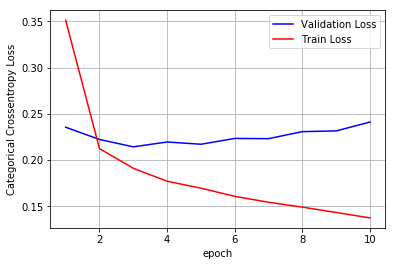

In [70]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [31]:
from keras.layers import  BatchNormalization
embedding_vecor_length = 32
model=Sequential()
model.add(Embedding(vocabulary, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,return_sequences=True,dropout=0.3))

# Adding second LSTM layer
model.add(LSTM(100, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 32)           1505216   
_________________________________________________________________
lstm_3 (LSTM)                (None, 300, 100)          53200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,638,917
Trainable params: 1,638,917
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - ETA: 32:25 - loss: 0.6252 - acc: 0.84 - ETA: 32:21 - loss: 0.6099 - acc: 0.83 - ETA: 32:35 - loss: 0.5891 - acc: 0.83 - ETA: 32:39 - loss: 0.5608 - acc: 0.84 - ETA: 32:33 - loss: 0.5377 - acc: 0.83 - ETA: 32:12 - loss: 0.5236 - acc: 0.84 - ETA: 32:21 - loss: 0.5134 - acc: 0.84 - ETA: 32:04 - loss: 0.4986 - acc: 0.84 - ETA: 31:44 - loss: 0.4951 - acc: 0.84 - ETA: 31:47 - loss: 0.4831 - acc: 0.84 - ETA: 32:00 - loss: 0.4804 - acc: 0.84 - ETA: 31:52 - loss: 0.4783 - acc: 0.84 - ETA: 32:05 - loss: 0.4745 - acc: 0.84 - ETA: 32:04 - loss: 0.4710 - acc: 0.84 - ETA: 31:53 - loss: 0.4689 - acc: 0.84 - ETA: 31:55 - loss: 0.4646 - acc: 0.84 - ETA: 31:56 - loss: 0.4618 - acc: 0.84 - ETA: 31:58 - loss: 0.4582 - acc: 0.84 - ETA: 31:57 - loss: 0.4568 - acc: 0.84 - ETA: 31:47 - loss: 0.4561 - acc: 0.84 - ETA: 31:36 - loss: 0.4563 - acc: 0.84 - ETA: 31:32 - loss: 0.4524 - acc: 0.84 - ETA: 31:23 -

70000/70000 [==============================] - ETA: 57:33 - loss: 0.2270 - acc: 0.91 - ETA: 56:16 - loss: 0.2213 - acc: 0.91 - ETA: 56:12 - loss: 0.2134 - acc: 0.91 - ETA: 56:49 - loss: 0.2011 - acc: 0.92 - ETA: 56:05 - loss: 0.1991 - acc: 0.92 - ETA: 56:17 - loss: 0.1965 - acc: 0.92 - ETA: 56:06 - loss: 0.1973 - acc: 0.92 - ETA: 55:42 - loss: 0.1999 - acc: 0.92 - ETA: 55:34 - loss: 0.2017 - acc: 0.92 - ETA: 55:23 - loss: 0.1993 - acc: 0.92 - ETA: 55:20 - loss: 0.1962 - acc: 0.92 - ETA: 55:06 - loss: 0.1963 - acc: 0.92 - ETA: 54:33 - loss: 0.1984 - acc: 0.92 - ETA: 53:57 - loss: 0.1959 - acc: 0.92 - ETA: 53:11 - loss: 0.1963 - acc: 0.92 - ETA: 52:36 - loss: 0.1958 - acc: 0.92 - ETA: 52:02 - loss: 0.1949 - acc: 0.92 - ETA: 51:44 - loss: 0.1952 - acc: 0.92 - ETA: 51:20 - loss: 0.1918 - acc: 0.92 - ETA: 50:53 - loss: 0.1930 - acc: 0.92 - ETA: 50:20 - loss: 0.1924 - acc: 0.92 - ETA: 49:43 - loss: 0.1936 - acc: 0.92 - ETA: 49:09 - loss: 0.1945 - acc: 0.92 - ETA: 48:35 - loss: 0.1954 - acc: 

70000/70000 [==============================] - ETA: 1:29:01 - loss: 0.2066 - acc: 0.93 - ETA: 1:35:55 - loss: 0.1826 - acc: 0.94 - ETA: 1:34:20 - loss: 0.1784 - acc: 0.93 - ETA: 1:32:35 - loss: 0.1881 - acc: 0.93 - ETA: 1:29:47 - loss: 0.1852 - acc: 0.93 - ETA: 1:26:47 - loss: 0.1819 - acc: 0.93 - ETA: 1:24:43 - loss: 0.1785 - acc: 0.93 - ETA: 1:23:31 - loss: 0.1779 - acc: 0.93 - ETA: 1:21:46 - loss: 0.1735 - acc: 0.93 - ETA: 1:20:32 - loss: 0.1723 - acc: 0.93 - ETA: 1:19:54 - loss: 0.1724 - acc: 0.93 - ETA: 1:19:00 - loss: 0.1738 - acc: 0.93 - ETA: 1:17:35 - loss: 0.1735 - acc: 0.93 - ETA: 1:16:05 - loss: 0.1741 - acc: 0.93 - ETA: 1:14:34 - loss: 0.1741 - acc: 0.93 - ETA: 1:13:33 - loss: 0.1743 - acc: 0.93 - ETA: 1:12:24 - loss: 0.1727 - acc: 0.93 - ETA: 1:11:07 - loss: 0.1748 - acc: 0.93 - ETA: 1:09:52 - loss: 0.1741 - acc: 0.93 - ETA: 1:08:43 - loss: 0.1750 - acc: 0.93 - ETA: 1:07:33 - loss: 0.1727 - acc: 0.93 - ETA: 1:07:03 - loss: 0.1721 - acc: 0.93 - ETA: 1:06:23 - loss: 0.1723 -

70000/70000 [==============================] - ETA: 1:14:50 - loss: 0.1787 - acc: 0.93 - ETA: 1:12:49 - loss: 0.1765 - acc: 0.93 - ETA: 1:10:09 - loss: 0.1801 - acc: 0.93 - ETA: 1:09:23 - loss: 0.1705 - acc: 0.93 - ETA: 1:08:22 - loss: 0.1677 - acc: 0.94 - ETA: 1:08:36 - loss: 0.1667 - acc: 0.93 - ETA: 1:09:20 - loss: 0.1636 - acc: 0.94 - ETA: 1:08:36 - loss: 0.1659 - acc: 0.93 - ETA: 1:07:39 - loss: 0.1633 - acc: 0.93 - ETA: 1:06:49 - loss: 0.1649 - acc: 0.93 - ETA: 1:06:04 - loss: 0.1656 - acc: 0.93 - ETA: 1:05:10 - loss: 0.1680 - acc: 0.93 - ETA: 1:04:22 - loss: 0.1688 - acc: 0.93 - ETA: 1:03:54 - loss: 0.1689 - acc: 0.93 - ETA: 1:03:09 - loss: 0.1687 - acc: 0.93 - ETA: 1:02:22 - loss: 0.1690 - acc: 0.93 - ETA: 1:01:46 - loss: 0.1712 - acc: 0.93 - ETA: 1:01:02 - loss: 0.1720 - acc: 0.93 - ETA: 1:00:17 - loss: 0.1706 - acc: 0.93 - ETA: 59:35 - loss: 0.1696 - acc: 0.9374 - ETA: 58:56 - loss: 0.1683 - acc: 0.93 - ETA: 58:16 - loss: 0.1674 - acc: 0.93 - ETA: 57:34 - loss: 0.1671 - acc: 

70000/70000 [==============================] - ETA: 1:08:41 - loss: 0.1574 - acc: 0.93 - ETA: 1:08:31 - loss: 0.1445 - acc: 0.94 - ETA: 1:08:16 - loss: 0.1460 - acc: 0.94 - ETA: 1:07:47 - loss: 0.1473 - acc: 0.94 - ETA: 1:07:12 - loss: 0.1478 - acc: 0.94 - ETA: 1:06:41 - loss: 0.1426 - acc: 0.94 - ETA: 1:06:11 - loss: 0.1432 - acc: 0.94 - ETA: 1:05:43 - loss: 0.1490 - acc: 0.94 - ETA: 1:05:15 - loss: 0.1517 - acc: 0.94 - ETA: 1:04:45 - loss: 0.1523 - acc: 0.94 - ETA: 1:04:14 - loss: 0.1541 - acc: 0.94 - ETA: 1:03:40 - loss: 0.1539 - acc: 0.94 - ETA: 1:03:24 - loss: 0.1545 - acc: 0.94 - ETA: 1:02:55 - loss: 0.1550 - acc: 0.94 - ETA: 1:02:25 - loss: 0.1551 - acc: 0.94 - ETA: 1:01:56 - loss: 0.1569 - acc: 0.94 - ETA: 1:01:22 - loss: 0.1566 - acc: 0.94 - ETA: 1:00:54 - loss: 0.1573 - acc: 0.94 - ETA: 1:00:24 - loss: 0.1575 - acc: 0.94 - ETA: 59:55 - loss: 0.1562 - acc: 0.9428 - ETA: 59:23 - loss: 0.1563 - acc: 0.94 - ETA: 58:50 - loss: 0.1570 - acc: 0.94 - ETA: 58:20 - loss: 0.1561 - acc: 

70000/70000 [==============================] - ETA: 1:11:26 - loss: 0.1570 - acc: 0.93 - ETA: 1:10:30 - loss: 0.1597 - acc: 0.94 - ETA: 1:09:50 - loss: 0.1627 - acc: 0.94 - ETA: 1:09:29 - loss: 0.1640 - acc: 0.93 - ETA: 1:09:03 - loss: 0.1566 - acc: 0.94 - ETA: 1:08:32 - loss: 0.1562 - acc: 0.94 - ETA: 1:07:56 - loss: 0.1512 - acc: 0.94 - ETA: 1:07:28 - loss: 0.1491 - acc: 0.94 - ETA: 1:06:53 - loss: 0.1479 - acc: 0.94 - ETA: 1:06:15 - loss: 0.1472 - acc: 0.94 - ETA: 1:05:44 - loss: 0.1437 - acc: 0.94 - ETA: 1:05:11 - loss: 0.1431 - acc: 0.94 - ETA: 1:04:35 - loss: 0.1429 - acc: 0.94 - ETA: 1:04:06 - loss: 0.1440 - acc: 0.94 - ETA: 1:03:34 - loss: 0.1443 - acc: 0.94 - ETA: 1:03:06 - loss: 0.1451 - acc: 0.94 - ETA: 1:02:30 - loss: 0.1440 - acc: 0.94 - ETA: 1:01:58 - loss: 0.1438 - acc: 0.94 - ETA: 1:01:29 - loss: 0.1455 - acc: 0.94 - ETA: 1:01:06 - loss: 0.1469 - acc: 0.94 - ETA: 1:00:33 - loss: 0.1481 - acc: 0.94 - ETA: 1:00:03 - loss: 0.1485 - acc: 0.94 - ETA: 59:31 - loss: 0.1480 - a

70000/70000 [==============================] - ETA: 1:01:16 - loss: 0.1357 - acc: 0.94 - ETA: 1:01:48 - loss: 0.1185 - acc: 0.95 - ETA: 1:01:08 - loss: 0.1426 - acc: 0.94 - ETA: 1:00:18 - loss: 0.1376 - acc: 0.94 - ETA: 1:00:08 - loss: 0.1319 - acc: 0.94 - ETA: 1:00:09 - loss: 0.1279 - acc: 0.95 - ETA: 59:45 - loss: 0.1245 - acc: 0.9520 - ETA: 59:39 - loss: 0.1270 - acc: 0.95 - ETA: 59:10 - loss: 0.1254 - acc: 0.95 - ETA: 58:27 - loss: 0.1252 - acc: 0.95 - ETA: 57:57 - loss: 0.1235 - acc: 0.95 - ETA: 57:24 - loss: 0.1222 - acc: 0.95 - ETA: 56:51 - loss: 0.1240 - acc: 0.95 - ETA: 56:20 - loss: 0.1242 - acc: 0.95 - ETA: 55:49 - loss: 0.1228 - acc: 0.95 - ETA: 55:19 - loss: 0.1211 - acc: 0.95 - ETA: 54:50 - loss: 0.1212 - acc: 0.95 - ETA: 54:19 - loss: 0.1217 - acc: 0.95 - ETA: 53:49 - loss: 0.1226 - acc: 0.95 - ETA: 53:19 - loss: 0.1229 - acc: 0.95 - ETA: 52:48 - loss: 0.1222 - acc: 0.95 - ETA: 52:18 - loss: 0.1220 - acc: 0.95 - ETA: 51:50 - loss: 0.1228 - acc: 0.95 - ETA: 51:21 - loss: 

70000/70000 [==============================] - ETA: 1:01:43 - loss: 0.1033 - acc: 0.96 - ETA: 1:01:37 - loss: 0.1256 - acc: 0.95 - ETA: 1:00:48 - loss: 0.1339 - acc: 0.94 - ETA: 1:00:18 - loss: 0.1329 - acc: 0.94 - ETA: 59:48 - loss: 0.1314 - acc: 0.9504 - ETA: 59:20 - loss: 0.1283 - acc: 0.94 - ETA: 58:52 - loss: 0.1291 - acc: 0.94 - ETA: 58:27 - loss: 0.1258 - acc: 0.95 - ETA: 57:57 - loss: 0.1241 - acc: 0.95 - ETA: 57:35 - loss: 0.1241 - acc: 0.95 - ETA: 57:08 - loss: 0.1250 - acc: 0.95 - ETA: 56:53 - loss: 0.1255 - acc: 0.95 - ETA: 56:25 - loss: 0.1265 - acc: 0.95 - ETA: 56:02 - loss: 0.1232 - acc: 0.95 - ETA: 55:35 - loss: 0.1260 - acc: 0.95 - ETA: 55:10 - loss: 0.1264 - acc: 0.95 - ETA: 54:42 - loss: 0.1257 - acc: 0.95 - ETA: 54:12 - loss: 0.1270 - acc: 0.95 - ETA: 53:43 - loss: 0.1263 - acc: 0.95 - ETA: 53:18 - loss: 0.1278 - acc: 0.95 - ETA: 52:51 - loss: 0.1262 - acc: 0.95 - ETA: 52:27 - loss: 0.1266 - acc: 0.95 - ETA: 52:00 - loss: 0.1269 - acc: 0.95 - ETA: 51:32 - loss: 0.12

70000/70000 [==============================] - ETA: 1:03:27 - loss: 0.0805 - acc: 0.97 - ETA: 1:02:59 - loss: 0.0994 - acc: 0.96 - ETA: 1:02:34 - loss: 0.1100 - acc: 0.96 - ETA: 1:02:00 - loss: 0.1190 - acc: 0.95 - ETA: 1:01:26 - loss: 0.1179 - acc: 0.95 - ETA: 1:00:48 - loss: 0.1161 - acc: 0.95 - ETA: 1:00:25 - loss: 0.1137 - acc: 0.96 - ETA: 59:52 - loss: 0.1125 - acc: 0.9619 - ETA: 59:21 - loss: 0.1134 - acc: 0.96 - ETA: 58:55 - loss: 0.1126 - acc: 0.96 - ETA: 58:28 - loss: 0.1124 - acc: 0.96 - ETA: 57:55 - loss: 0.1112 - acc: 0.96 - ETA: 57:26 - loss: 0.1126 - acc: 0.96 - ETA: 57:00 - loss: 0.1139 - acc: 0.96 - ETA: 56:30 - loss: 0.1129 - acc: 0.96 - ETA: 56:01 - loss: 0.1153 - acc: 0.96 - ETA: 55:35 - loss: 0.1158 - acc: 0.96 - ETA: 55:06 - loss: 0.1147 - acc: 0.96 - ETA: 54:40 - loss: 0.1158 - acc: 0.95 - ETA: 54:14 - loss: 0.1156 - acc: 0.95 - ETA: 53:47 - loss: 0.1150 - acc: 0.95 - ETA: 53:18 - loss: 0.1153 - acc: 0.95 - ETA: 52:51 - loss: 0.1144 - acc: 0.96 - ETA: 52:23 - loss

70000/70000 [==============================] - ETA: 1:00:29 - loss: 0.1111 - acc: 0.96 - ETA: 1:00:30 - loss: 0.1272 - acc: 0.95 - ETA: 1:00:03 - loss: 0.1178 - acc: 0.95 - ETA: 59:42 - loss: 0.1175 - acc: 0.9590 - ETA: 59:18 - loss: 0.1171 - acc: 0.95 - ETA: 58:56 - loss: 0.1164 - acc: 0.95 - ETA: 58:27 - loss: 0.1157 - acc: 0.95 - ETA: 58:02 - loss: 0.1142 - acc: 0.95 - ETA: 57:39 - loss: 0.1096 - acc: 0.95 - ETA: 57:07 - loss: 0.1112 - acc: 0.95 - ETA: 56:40 - loss: 0.1124 - acc: 0.95 - ETA: 56:14 - loss: 0.1107 - acc: 0.95 - ETA: 55:45 - loss: 0.1111 - acc: 0.95 - ETA: 55:18 - loss: 0.1094 - acc: 0.95 - ETA: 54:53 - loss: 0.1104 - acc: 0.95 - ETA: 54:27 - loss: 0.1093 - acc: 0.95 - ETA: 54:01 - loss: 0.1090 - acc: 0.95 - ETA: 53:34 - loss: 0.1080 - acc: 0.95 - ETA: 53:10 - loss: 0.1067 - acc: 0.96 - ETA: 52:44 - loss: 0.1061 - acc: 0.96 - ETA: 52:15 - loss: 0.1062 - acc: 0.96 - ETA: 51:50 - loss: 0.1062 - acc: 0.96 - ETA: 51:22 - loss: 0.1073 - acc: 0.96 - ETA: 50:54 - loss: 0.1060

Test loss: 0.24440142049988112
Test accuracy: 0.9119


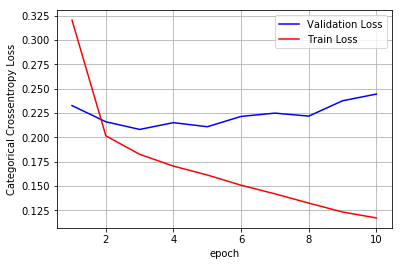

In [36]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [37]:
from keras.layers import  BatchNormalization
embedding_vecor_length = 32
model=Sequential()
model.add(Embedding(vocabulary, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,return_sequences=True,dropout=0.2))

# Adding second LSTM layer
model.add(LSTM(100, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 32)           1505216   
_________________________________________________________________
lstm_5 (LSTM)                (None, 300, 100)          53200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,638,917
Trainable params: 1,638,917
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))


Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - ETA: 1:07:23 - loss: 0.6933 - acc: 0.45 - ETA: 1:03:31 - loss: 0.6900 - acc: 0.63 - ETA: 1:02:11 - loss: 0.6857 - acc: 0.72 - ETA: 1:00:56 - loss: 0.6810 - acc: 0.75 - ETA: 1:00:10 - loss: 0.6754 - acc: 0.77 - ETA: 59:25 - loss: 0.6696 - acc: 0.7839 - ETA: 58:43 - loss: 0.6608 - acc: 0.79 - ETA: 58:06 - loss: 0.6488 - acc: 0.79 - ETA: 57:34 - loss: 0.6310 - acc: 0.80 - ETA: 57:03 - loss: 0.6115 - acc: 0.80 - ETA: 56:36 - loss: 0.6020 - acc: 0.81 - ETA: 56:01 - loss: 0.6023 - acc: 0.80 - ETA: 55:33 - loss: 0.5952 - acc: 0.80 - ETA: 55:01 - loss: 0.5810 - acc: 0.81 - ETA: 54:33 - loss: 0.5719 - acc: 0.81 - ETA: 54:05 - loss: 0.5603 - acc: 0.81 - ETA: 53:37 - loss: 0.5533 - acc: 0.82 - ETA: 53:07 - loss: 0.5472 - acc: 0.82 - ETA: 52:38 - loss: 0.5410 - acc: 0.82 - ETA: 52:09 - loss: 0.5374 - acc: 0.82 - ETA: 51:41 - loss: 0.5322 - acc: 0.82 - ETA: 51:13 - loss: 0.5290 - acc: 0.82 - 

70000/70000 [==============================] - ETA: 1:12:26 - loss: 0.1820 - acc: 0.94 - ETA: 1:11:21 - loss: 0.2056 - acc: 0.91 - ETA: 1:10:04 - loss: 0.1882 - acc: 0.92 - ETA: 1:09:39 - loss: 0.1933 - acc: 0.92 - ETA: 1:08:49 - loss: 0.1922 - acc: 0.92 - ETA: 1:08:15 - loss: 0.1874 - acc: 0.92 - ETA: 1:09:53 - loss: 0.1912 - acc: 0.92 - ETA: 1:10:24 - loss: 0.1909 - acc: 0.92 - ETA: 1:12:23 - loss: 0.1908 - acc: 0.92 - ETA: 1:12:43 - loss: 0.1952 - acc: 0.92 - ETA: 1:12:48 - loss: 0.1939 - acc: 0.92 - ETA: 1:12:31 - loss: 0.1947 - acc: 0.92 - ETA: 1:11:53 - loss: 0.1954 - acc: 0.92 - ETA: 1:11:03 - loss: 0.1975 - acc: 0.92 - ETA: 1:10:19 - loss: 0.1972 - acc: 0.92 - ETA: 1:10:08 - loss: 0.1978 - acc: 0.92 - ETA: 1:09:53 - loss: 0.1987 - acc: 0.92 - ETA: 1:09:11 - loss: 0.1971 - acc: 0.92 - ETA: 1:08:36 - loss: 0.1970 - acc: 0.92 - ETA: 1:07:57 - loss: 0.1978 - acc: 0.92 - ETA: 1:08:05 - loss: 0.1969 - acc: 0.92 - ETA: 1:07:48 - loss: 0.1986 - acc: 0.92 - ETA: 1:07:25 - loss: 0.1986 -

70000/70000 [==============================] - ETA: 1:13:07 - loss: 0.2011 - acc: 0.92 - ETA: 1:12:54 - loss: 0.1863 - acc: 0.93 - ETA: 1:12:53 - loss: 0.1795 - acc: 0.93 - ETA: 1:11:38 - loss: 0.1731 - acc: 0.93 - ETA: 1:10:26 - loss: 0.1721 - acc: 0.93 - ETA: 1:09:05 - loss: 0.1694 - acc: 0.93 - ETA: 1:08:06 - loss: 0.1729 - acc: 0.93 - ETA: 1:07:18 - loss: 0.1695 - acc: 0.93 - ETA: 1:06:32 - loss: 0.1696 - acc: 0.93 - ETA: 1:05:45 - loss: 0.1717 - acc: 0.93 - ETA: 1:05:01 - loss: 0.1708 - acc: 0.93 - ETA: 1:04:18 - loss: 0.1720 - acc: 0.93 - ETA: 1:03:48 - loss: 0.1690 - acc: 0.93 - ETA: 1:03:09 - loss: 0.1697 - acc: 0.93 - ETA: 1:02:30 - loss: 0.1719 - acc: 0.93 - ETA: 1:01:52 - loss: 0.1722 - acc: 0.93 - ETA: 1:01:19 - loss: 0.1720 - acc: 0.93 - ETA: 1:00:47 - loss: 0.1715 - acc: 0.93 - ETA: 1:00:18 - loss: 0.1700 - acc: 0.93 - ETA: 59:49 - loss: 0.1699 - acc: 0.9366 - ETA: 59:17 - loss: 0.1706 - acc: 0.93 - ETA: 58:46 - loss: 0.1692 - acc: 0.93 - ETA: 58:27 - loss: 0.1698 - acc: 

70000/70000 [==============================] - ETA: 1:08:46 - loss: 0.1693 - acc: 0.94 - ETA: 1:10:26 - loss: 0.1921 - acc: 0.92 - ETA: 1:09:30 - loss: 0.1888 - acc: 0.93 - ETA: 1:08:47 - loss: 0.1744 - acc: 0.93 - ETA: 1:08:16 - loss: 0.1674 - acc: 0.93 - ETA: 1:07:56 - loss: 0.1590 - acc: 0.94 - ETA: 1:07:25 - loss: 0.1544 - acc: 0.94 - ETA: 1:06:47 - loss: 0.1576 - acc: 0.94 - ETA: 1:06:32 - loss: 0.1575 - acc: 0.94 - ETA: 1:05:58 - loss: 0.1600 - acc: 0.94 - ETA: 1:05:21 - loss: 0.1609 - acc: 0.94 - ETA: 1:04:42 - loss: 0.1614 - acc: 0.94 - ETA: 1:04:02 - loss: 0.1617 - acc: 0.94 - ETA: 1:03:29 - loss: 0.1646 - acc: 0.93 - ETA: 1:03:03 - loss: 0.1637 - acc: 0.94 - ETA: 1:03:05 - loss: 0.1651 - acc: 0.93 - ETA: 1:03:56 - loss: 0.1631 - acc: 0.93 - ETA: 1:04:02 - loss: 0.1611 - acc: 0.94 - ETA: 1:03:38 - loss: 0.1603 - acc: 0.94 - ETA: 1:03:05 - loss: 0.1587 - acc: 0.94 - ETA: 1:02:39 - loss: 0.1613 - acc: 0.93 - ETA: 1:02:15 - loss: 0.1604 - acc: 0.94 - ETA: 1:01:41 - loss: 0.1615 -

70000/70000 [==============================] - ETA: 1:12:00 - loss: 0.1544 - acc: 0.93 - ETA: 1:10:59 - loss: 0.1486 - acc: 0.94 - ETA: 1:10:23 - loss: 0.1533 - acc: 0.94 - ETA: 1:10:36 - loss: 0.1473 - acc: 0.94 - ETA: 1:14:49 - loss: 0.1445 - acc: 0.94 - ETA: 1:16:41 - loss: 0.1423 - acc: 0.94 - ETA: 1:18:05 - loss: 0.1424 - acc: 0.94 - ETA: 1:18:41 - loss: 0.1443 - acc: 0.94 - ETA: 1:19:04 - loss: 0.1486 - acc: 0.94 - ETA: 1:19:16 - loss: 0.1473 - acc: 0.94 - ETA: 1:19:11 - loss: 0.1479 - acc: 0.94 - ETA: 1:19:10 - loss: 0.1484 - acc: 0.94 - ETA: 1:18:14 - loss: 0.1463 - acc: 0.94 - ETA: 1:16:41 - loss: 0.1491 - acc: 0.94 - ETA: 1:15:14 - loss: 0.1472 - acc: 0.94 - ETA: 1:13:50 - loss: 0.1504 - acc: 0.94 - ETA: 1:13:08 - loss: 0.1489 - acc: 0.94 - ETA: 1:12:50 - loss: 0.1498 - acc: 0.94 - ETA: 1:12:38 - loss: 0.1501 - acc: 0.94 - ETA: 1:12:28 - loss: 0.1488 - acc: 0.94 - ETA: 1:12:25 - loss: 0.1484 - acc: 0.94 - ETA: 1:12:22 - loss: 0.1476 - acc: 0.94 - ETA: 1:12:18 - loss: 0.1482 -

70000/70000 [==============================] - ETA: 1:09:30 - loss: 0.1332 - acc: 0.94 - ETA: 1:09:27 - loss: 0.1409 - acc: 0.94 - ETA: 1:09:00 - loss: 0.1402 - acc: 0.94 - ETA: 1:08:14 - loss: 0.1370 - acc: 0.94 - ETA: 1:09:48 - loss: 0.1351 - acc: 0.94 - ETA: 1:09:54 - loss: 0.1386 - acc: 0.94 - ETA: 1:09:35 - loss: 0.1347 - acc: 0.94 - ETA: 1:08:46 - loss: 0.1420 - acc: 0.94 - ETA: 1:07:57 - loss: 0.1411 - acc: 0.94 - ETA: 1:07:18 - loss: 0.1385 - acc: 0.94 - ETA: 1:06:33 - loss: 0.1371 - acc: 0.94 - ETA: 1:05:54 - loss: 0.1402 - acc: 0.94 - ETA: 1:05:22 - loss: 0.1400 - acc: 0.94 - ETA: 1:04:35 - loss: 0.1424 - acc: 0.94 - ETA: 1:03:31 - loss: 0.1407 - acc: 0.94 - ETA: 1:02:35 - loss: 0.1437 - acc: 0.94 - ETA: 1:01:39 - loss: 0.1430 - acc: 0.94 - ETA: 1:00:48 - loss: 0.1440 - acc: 0.94 - ETA: 59:58 - loss: 0.1440 - acc: 0.9452 - ETA: 59:11 - loss: 0.1444 - acc: 0.94 - ETA: 58:26 - loss: 0.1450 - acc: 0.94 - ETA: 57:43 - loss: 0.1443 - acc: 0.94 - ETA: 57:06 - loss: 0.1454 - acc: 0.

70000/70000 [==============================] - ETA: 1:20:21 - loss: 0.1262 - acc: 0.96 - ETA: 1:14:58 - loss: 0.1302 - acc: 0.95 - ETA: 1:12:24 - loss: 0.1274 - acc: 0.95 - ETA: 1:10:55 - loss: 0.1223 - acc: 0.95 - ETA: 1:10:03 - loss: 0.1257 - acc: 0.95 - ETA: 1:09:00 - loss: 0.1242 - acc: 0.95 - ETA: 1:08:10 - loss: 0.1207 - acc: 0.95 - ETA: 1:07:37 - loss: 0.1221 - acc: 0.95 - ETA: 1:07:00 - loss: 0.1250 - acc: 0.95 - ETA: 1:06:18 - loss: 0.1262 - acc: 0.95 - ETA: 1:05:45 - loss: 0.1270 - acc: 0.95 - ETA: 1:05:13 - loss: 0.1268 - acc: 0.95 - ETA: 1:04:39 - loss: 0.1276 - acc: 0.95 - ETA: 1:04:02 - loss: 0.1276 - acc: 0.95 - ETA: 1:03:27 - loss: 0.1292 - acc: 0.95 - ETA: 1:03:13 - loss: 0.1310 - acc: 0.95 - ETA: 1:03:22 - loss: 0.1303 - acc: 0.95 - ETA: 1:02:55 - loss: 0.1296 - acc: 0.95 - ETA: 1:02:17 - loss: 0.1309 - acc: 0.95 - ETA: 1:01:48 - loss: 0.1301 - acc: 0.95 - ETA: 1:01:11 - loss: 0.1311 - acc: 0.95 - ETA: 1:00:36 - loss: 0.1301 - acc: 0.95 - ETA: 1:00:00 - loss: 0.1302 -

70000/70000 [==============================] - ETA: 1:08:23 - loss: 0.1216 - acc: 0.95 - ETA: 1:07:36 - loss: 0.1201 - acc: 0.95 - ETA: 1:07:04 - loss: 0.1250 - acc: 0.95 - ETA: 1:06:27 - loss: 0.1253 - acc: 0.95 - ETA: 1:06:03 - loss: 0.1216 - acc: 0.95 - ETA: 1:05:36 - loss: 0.1308 - acc: 0.95 - ETA: 1:05:08 - loss: 0.1319 - acc: 0.95 - ETA: 1:04:44 - loss: 0.1290 - acc: 0.95 - ETA: 1:04:25 - loss: 0.1290 - acc: 0.95 - ETA: 1:03:51 - loss: 0.1281 - acc: 0.95 - ETA: 1:03:20 - loss: 0.1286 - acc: 0.95 - ETA: 1:02:52 - loss: 0.1259 - acc: 0.95 - ETA: 1:02:21 - loss: 0.1249 - acc: 0.95 - ETA: 1:01:54 - loss: 0.1254 - acc: 0.95 - ETA: 1:01:25 - loss: 0.1303 - acc: 0.95 - ETA: 1:00:57 - loss: 0.1287 - acc: 0.95 - ETA: 1:00:25 - loss: 0.1300 - acc: 0.95 - ETA: 59:51 - loss: 0.1288 - acc: 0.9544 - ETA: 59:16 - loss: 0.1272 - acc: 0.95 - ETA: 58:44 - loss: 0.1284 - acc: 0.95 - ETA: 58:11 - loss: 0.1270 - acc: 0.95 - ETA: 57:40 - loss: 0.1274 - acc: 0.95 - ETA: 57:09 - loss: 0.1281 - acc: 0.95

70000/70000 [==============================] - ETA: 1:07:53 - loss: 0.1317 - acc: 0.96 - ETA: 1:07:14 - loss: 0.1224 - acc: 0.96 - ETA: 1:06:34 - loss: 0.1132 - acc: 0.96 - ETA: 1:06:13 - loss: 0.1116 - acc: 0.96 - ETA: 1:05:50 - loss: 0.1178 - acc: 0.96 - ETA: 1:05:19 - loss: 0.1180 - acc: 0.96 - ETA: 1:04:44 - loss: 0.1125 - acc: 0.96 - ETA: 1:04:04 - loss: 0.1119 - acc: 0.96 - ETA: 1:03:34 - loss: 0.1113 - acc: 0.96 - ETA: 1:03:08 - loss: 0.1132 - acc: 0.96 - ETA: 1:02:54 - loss: 0.1118 - acc: 0.96 - ETA: 1:02:24 - loss: 0.1113 - acc: 0.96 - ETA: 1:01:55 - loss: 0.1095 - acc: 0.96 - ETA: 1:01:23 - loss: 0.1112 - acc: 0.96 - ETA: 1:00:56 - loss: 0.1101 - acc: 0.96 - ETA: 1:00:22 - loss: 0.1083 - acc: 0.96 - ETA: 59:56 - loss: 0.1091 - acc: 0.9622 - ETA: 59:24 - loss: 0.1097 - acc: 0.96 - ETA: 58:53 - loss: 0.1109 - acc: 0.96 - ETA: 58:20 - loss: 0.1112 - acc: 0.96 - ETA: 57:50 - loss: 0.1100 - acc: 0.96 - ETA: 57:19 - loss: 0.1099 - acc: 0.96 - ETA: 56:50 - loss: 0.1127 - acc: 0.96 -

70000/70000 [==============================] - ETA: 1:08:35 - loss: 0.1419 - acc: 0.95 - ETA: 1:13:18 - loss: 0.1253 - acc: 0.95 - ETA: 1:11:12 - loss: 0.1121 - acc: 0.96 - ETA: 1:10:22 - loss: 0.1078 - acc: 0.96 - ETA: 1:10:14 - loss: 0.1023 - acc: 0.96 - ETA: 1:10:19 - loss: 0.0965 - acc: 0.96 - ETA: 1:10:02 - loss: 0.0943 - acc: 0.96 - ETA: 1:09:34 - loss: 0.0910 - acc: 0.96 - ETA: 1:09:11 - loss: 0.0908 - acc: 0.96 - ETA: 1:09:28 - loss: 0.0911 - acc: 0.96 - ETA: 1:09:24 - loss: 0.0922 - acc: 0.96 - ETA: 1:09:02 - loss: 0.0947 - acc: 0.96 - ETA: 1:08:25 - loss: 0.0975 - acc: 0.96 - ETA: 1:08:50 - loss: 0.0963 - acc: 0.96 - ETA: 1:08:06 - loss: 0.0960 - acc: 0.96 - ETA: 1:07:31 - loss: 0.0977 - acc: 0.96 - ETA: 1:07:11 - loss: 0.1007 - acc: 0.96 - ETA: 1:06:37 - loss: 0.1019 - acc: 0.96 - ETA: 1:06:03 - loss: 0.1025 - acc: 0.96 - ETA: 1:05:28 - loss: 0.1022 - acc: 0.96 - ETA: 1:04:52 - loss: 0.1023 - acc: 0.96 - ETA: 1:04:15 - loss: 0.1026 - acc: 0.96 - ETA: 1:03:53 - loss: 0.1032 -

Test loss: 0.2395610534230868
Test accuracy: 0.9101


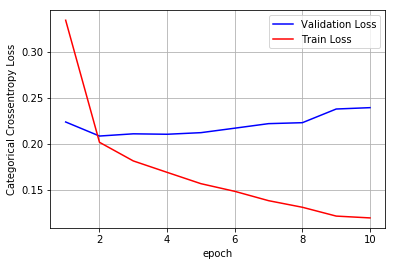

In [40]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 10

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Observations

<table>
    <tr>
        <th>no of layer archi</th>
        <th>dropout rate</th>
        <th>best epoch</th>
        <th>accu</th>
        <th>loss</th>
    </tr>
    <tr>
        <td>1</td>
        <td>0.2</td>
        <td>2</td>
        <td>91.1%</td>
        <td>0.2427</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0.4</td>
        <td>2</td>
        <td>91.5%</td>
        <td>0.2427</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0.3</td>
        <td>2</td>
        <td>91.26%</td>
        <td>0.2427</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.5</td>
        <td>2</td>
        <td>91.4%</td>
        <td>0.2411</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.3</td>
        <td>3</td>
        <td>91.1%</td>
        <td>0.24440</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.2</td>
        <td>3</td>
        <td>91.1%</td>
        <td>0.2395</td>
    </tr>
</table>

# Steps

1. Load the data and preprocess the data.

2. Then with counter() we can have no of times the words have appeared in the corpus.

3. Then we took top 7000 words and we have formed a vector which consists of those words only.

4. Then we have declared a fuction which assigns ranks for word count in ascending order.

5. Then we have constructed reviews of uniform length of 300 size using padding.

6. From the above steps we will get tha data in te imdb format and we have declared the LSTM models with different dropout rates and different architectures.

# Conclusions

1.From the above table we can see that both models are having accuracy more than 91%.

2.when we have changed the dropout rates also we are seeing the same accuracy in the models.

2.We can observe from the graphs that models are trying to overfit the data as we increas ethe epochs.

3.We also observe that the computation time also increased as we have increased the no of layers.